**Principal Component Analysis(PCA)**

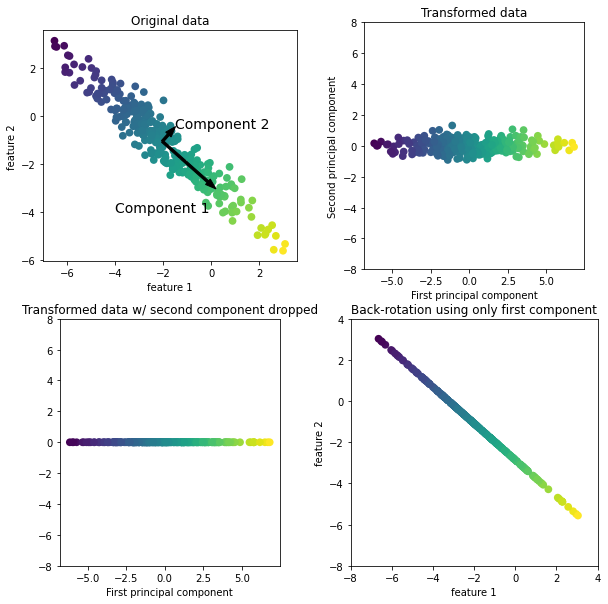

In [2]:
import mglearn
mglearn.plots.plot_pca_illustration()

Applying PCA to the cancer dataset for visualization

Computing histograms of each of the features for the two classes, benign and malignant cancer

In [3]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
import numpy as np

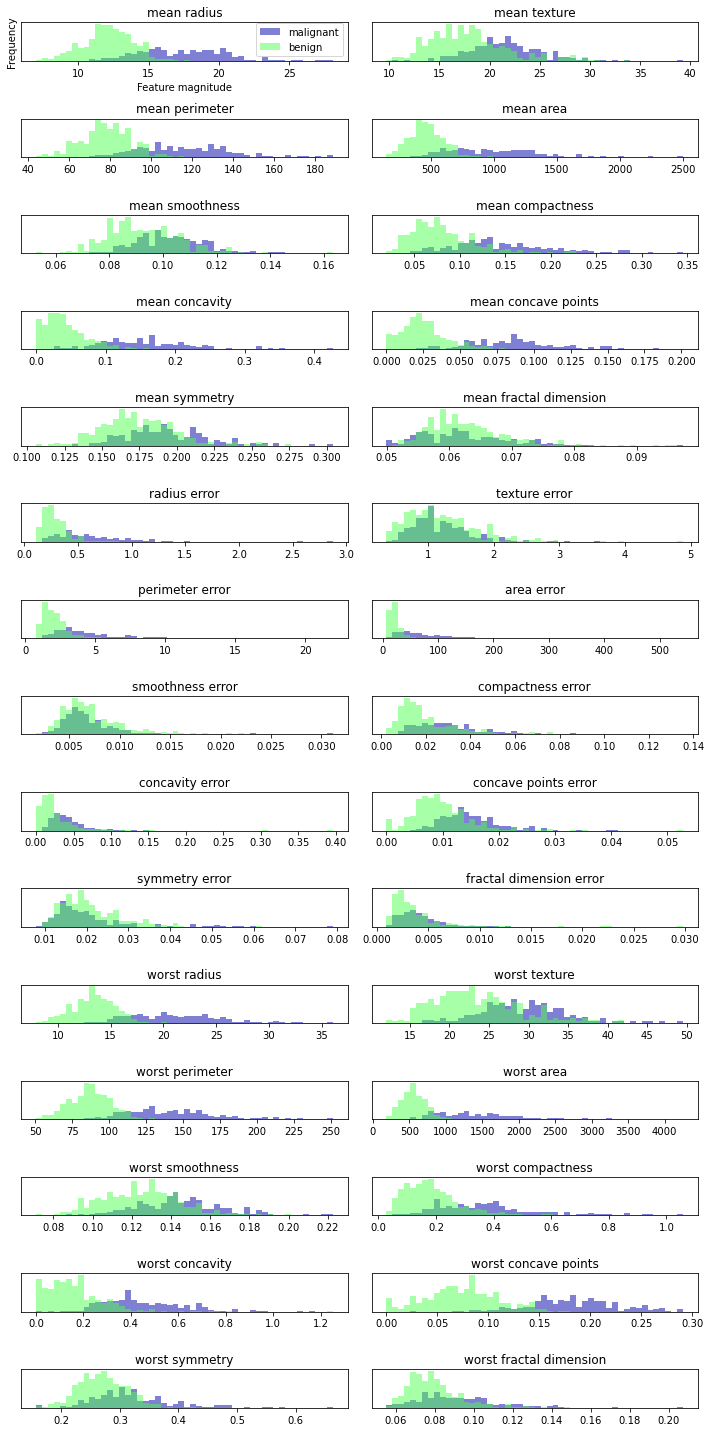

In [4]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(15,2, figsize=(10,20))
malignant = cancer.data[cancer.target==0]
benign = cancer.data[cancer.target==1]
ax = axes.ravel()
for i in range(30):
  _, bins = np.histogram(cancer.data[:,i],bins=50)
  ax[i].hist(malignant[:,i],bins=bins,color=mglearn.cm3(0),alpha=.5)
  ax[i].hist(benign[:,i],bins=bins, color=mglearn.cm3(2),alpha=.5)
  ax[i].set_title(cancer.feature_names[i])
  ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant","benign"],loc="best")
fig.tight_layout()

The feature "Smoothness error" seems quite uninformative, because the two histograms mostly overlap, while the feature "worst concave points" seems quite informative, because the histograms are quite disjoint.

In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
cancer = load_breast_cancer()
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [6]:
from sklearn.decomposition import PCA
#keep the first two components of the data
pca = PCA(n_components=2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)
print("Original shape :{}".format(str(X_scaled.shape)))
print("Reduced shape :{}".format(str(X_pca.shape)))


Original shape :(569, 30)
Reduced shape :(569, 2)


Text(0, 0.5, 'Second principal component')

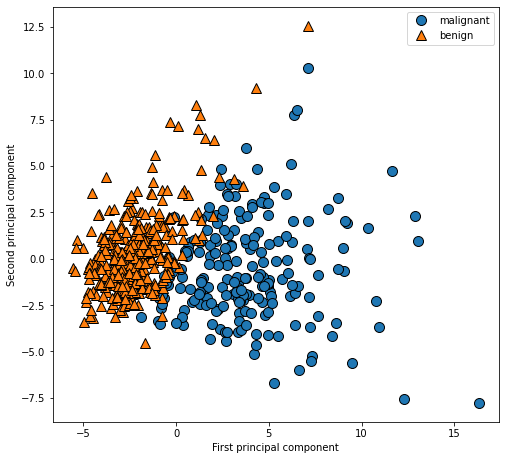

In [7]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:,0],X_pca[:,1],cancer.target)
plt.legend(cancer.target_names,loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

In [8]:
print("PCA component shape : {}".format(pca.components_.shape))


PCA component shape : (2, 30)


In [9]:
print("PCA components: \n{}".format(pca.components_))

PCA components: 
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


we can also visualize the coefficients using a heat map, which might be easier to understand

Text(0, 0.5, 'Principal components')

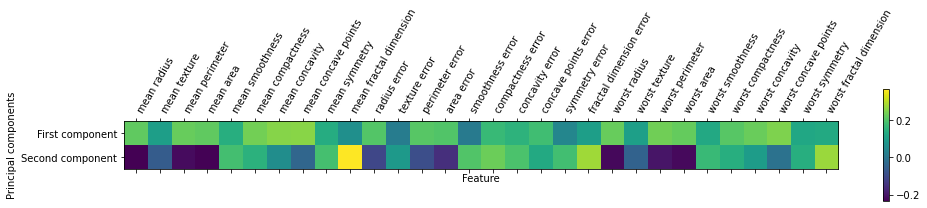

In [10]:
plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1],["First component","Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),cancer.feature_names,rotation=60,ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

**Eigenfaces for feature extraction**

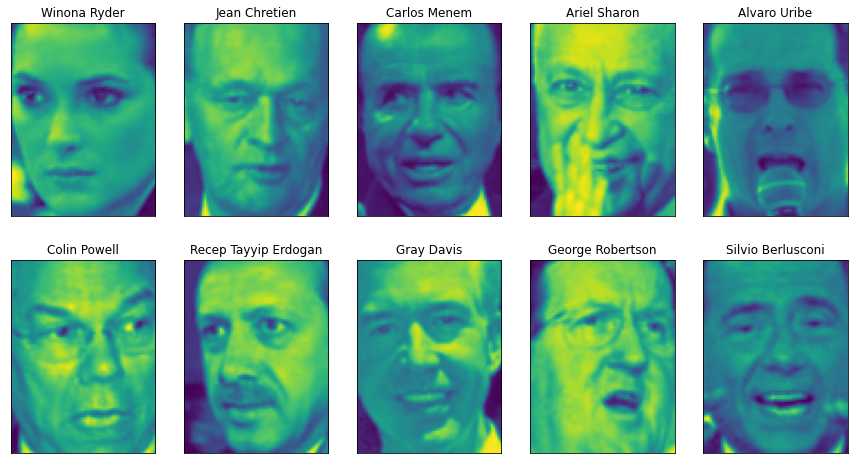

In [11]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape
fig, axes = plt.subplots(2,5, figsize=(15,8),subplot_kw={'xticks':(),'yticks':()})
for target, image, ax in zip(people.target,people.images,axes.ravel()):
  ax.imshow(image)
  ax.set_title(people.target_names[target])

In [12]:
print("people.images.shape: {}".format(people.images.shape))
print("Number of classes: {}".format(len(people.target_names)))

people.images.shape: (3023, 87, 65)
Number of classes: 62


the dataset is a bit skewed, however, containing a lot of images of George W. Bush and Colin Powell

In [13]:
#count how often each target appears
counts = np.bincount(people.target)
for i, (count,name) in enumerate(zip(counts,people.target_names)):
  print("{0:25} {1:3}".format(name,count), end='  ')
  if (i+1)%3==0:
    print()

Alejandro Toledo           39  Alvaro Uribe               35  Amelie Mauresmo            21  
Andre Agassi               36  Angelina Jolie             20  Ariel Sharon               77  
Arnold Schwarzenegger      42  Atal Bihari Vajpayee       24  Bill Clinton               29  
Carlos Menem               21  Colin Powell              236  David Beckham              31  
Donald Rumsfeld           121  George Robertson           22  George W Bush             530  
Gerhard Schroeder         109  Gloria Macapagal Arroyo    44  Gray Davis                 26  
Guillermo Coria            30  Hamid Karzai               22  Hans Blix                  39  
Hugo Chavez                71  Igor Ivanov                20  Jack Straw                 28  
Jacques Chirac             52  Jean Chretien              55  Jennifer Aniston           21  
Jennifer Capriati          42  Jennifer Lopez             21  Jeremy Greenstock          24  
Jiang Zemin                20  John Ashcroft              53

to make the data less skewed, we will only take up to 50 images of each person.

In [14]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
  mask[np.where(people.target == target)[0][:50]]=1
X_people = people.data[mask]
y_people = people.target[mask]



<ipython-input-14-23d97d0a5887>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(people.target.shape, dtype=np.bool)


In [15]:
# scale the grayscale values to be between 0 and 1
# instead of 0 and 255 for better numeric stability
X_people = X_people/255.

A common task in face recognition is to ask if a previously unseen face belongs to a known person from a database. This has applications in photo collection, social media, and security applications. One way to solve this problem would be to build a classifier where each person is a separate  class. However, there are usually many different people in face databases, and very few images of the same person. That makes it hard to train most classifiers. Additionally,you often want to be able to add new people easily, without needing to retrain a large model.

A sample solution is to use a one-nearest-neighbor clasifier that looks for the most similar face image to the face you are classifying. This classifier could in principle work with only a single training example per class. Lets take a look at how well KNeighborsClassifier does here:


In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_people,y_people,stratify=y_people,random_state=0)


In [17]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train,y_train)
print("Test set score of 1-nn: {:.2f}".format(knn.score(X_test,y_test)))

Test set score of 1-nn: 0.23


we obtain an accuracy of 23%, which is not actually that bad for a 62 class classification problem( random guessing would give you around 1/62 = 1.6% accuracy), but is also not great. We only identify a person every fourth time.

This is where PCA comes in. Computing distance in original pixel space is quite a bad way to measure similarity between faces. When using a pixel representation to compare two images, we compare the grayscale values of each individual pixel to the value of the pixel in the corresponding position in the other image. The representation is quite different from how humans would interpret the image of a face, and it is hard to capture the facial features using this raw representation. For ex, using pixel distance means that shifting a face by one pixel to the right corresponds to a drastic change, with a completely different representaion. We hope that using distance along principal components can improve our accuracy. Here , we enable the whitening option of PCA, which rescales the principal components to have the same scale. This is the same as using StandardScaler after the transformation. Whitening corresponds to not only rotating the data, but also rescaling it so that the center panel is a circle instead of an ellipse.

In [18]:
import mglearn

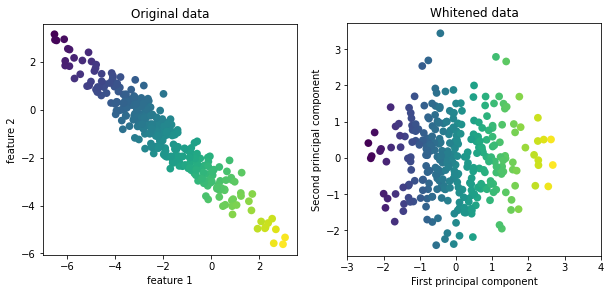

In [19]:
mglearn.plots.plot_pca_whitening()

we fit the PCA object to the training data and extract the first 100 principal components. Then we transform the training and test data:

In [20]:
pca = PCA(n_components=100, whiten = True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train_pca.shape: {}".format(X_train_pca.shape))

X_train_pca.shape: (1547, 100)


The new data has 100 features, the first 100 principal components. Now, we can use the new representation to classify our images using a one-nearest neighbors classifier:

In [21]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca,y_train)
print("Test set accuracy : {:.2f}".format(knn.score(X_test_pca,y_test)))

Test set accuracy : 0.31


Lets look at some of the principal components

In [22]:
print("pca.components_.shape: {}".format(pca.components_.shape))

pca.components_.shape: (100, 5655)


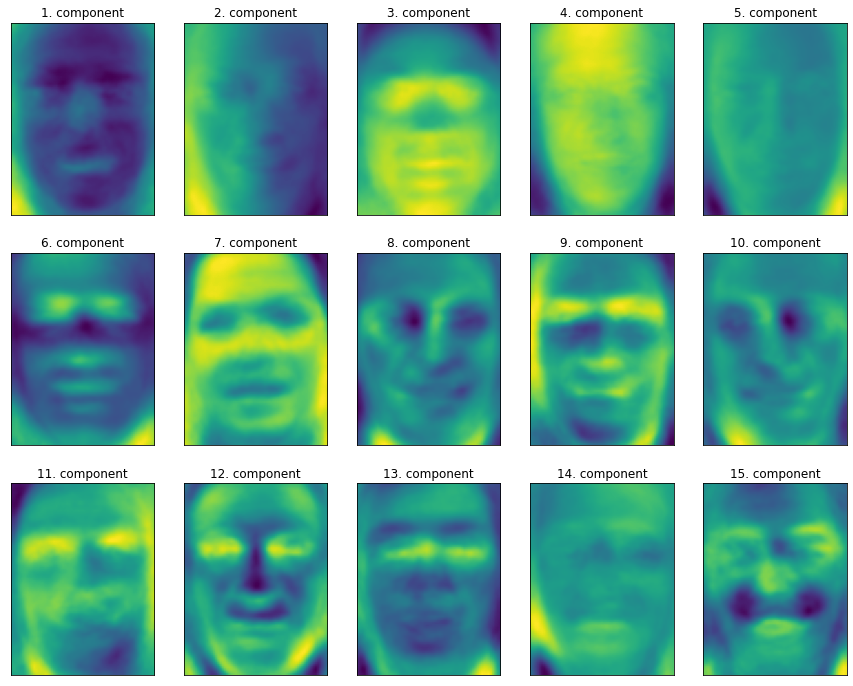

In [23]:
fix, axes = plt.subplots(3,5 , figsize=(15,12), subplot_kw = {'xticks':(),'yticks':()})
for i, (component, ax) in enumerate(zip(pca.components_,axes.ravel())):
    ax.imshow(component.reshape(image_shape),cmap='viridis')
    ax.set_title("{}. component".format((i+1)))

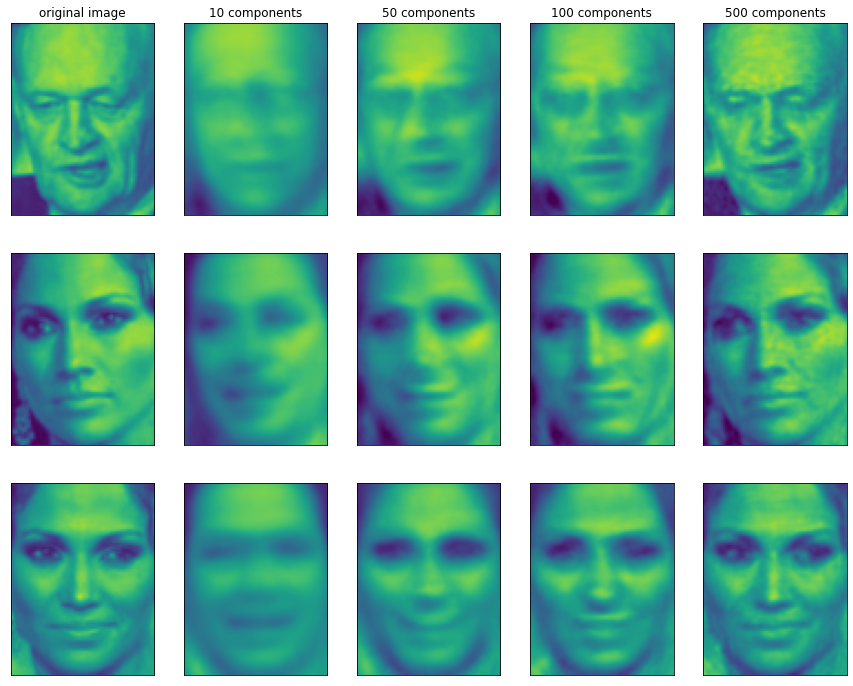

In [24]:
mglearn.plots.plot_pca_faces(X_train,X_test,image.shape)

here we applied pca_transform and pca_inverse_transform on each image

# we can also use PCA to visualize all the faces in the dataset in a scatter plot using the first two principal components

Text(0, 0.5, 'Second principal component')

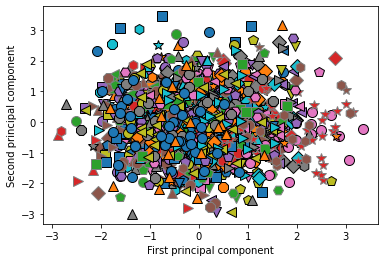

In [25]:
mglearn.discrete_scatter(X_train_pca[:,0],X_train_pca[:,1],y_train)
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

# Non-negative matrix factorization(NMF)

another unsupervised learning algorithm that aims to extract useful features.
in pca we wanted components that were orthogonal and that explained as much variance of the data as possible, in the NMF, we want the components and the coefficients to be non-negative. that is, we want both the components and coefficeints to be greater than or equal to zero. Consequently, this method can only be applied to data where each feature is non-negatve, as a non-negative sum of non-negative components cannot become negative.

the process of decomposing data into non-negative weighted sum is particularly helpful for data that is created as the addition of several independent sources, such as an audio track of multiple people speaking, or music with many instruments. In these situations NMF leads to more interpretable components than PCA, as negative components and coefficients can lead to hard-to-interpret cancellation effect

## applying NMF to synthetic data

C:\Users\acer\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
C:\Users\acer\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
C:\Users\acer\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
C:\Users\acer\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1090: ConvergenceWarning: Maximum number of iterations

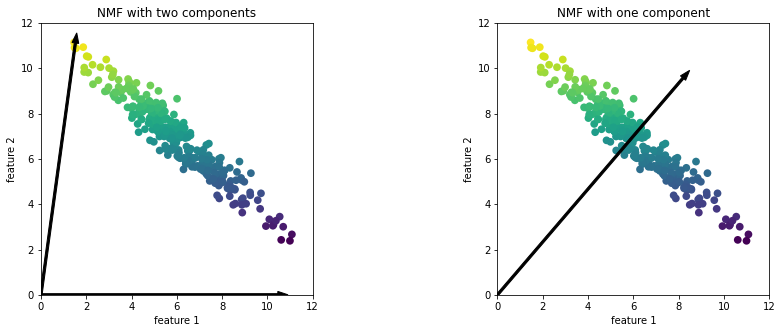

In [26]:
mglearn.plots.plot_nmf_illustration()

components in NMF are also not ordered in any specific way, so there is no "first non-negative component": all components play an equal part.

# Applying NMF to face images
let's inspect how the number of components impacts how well the data can be reconstructed using NMF

________________________________________________________________________________
[Memory] Calling mglearn.plot_nmf.nmf_faces...
nmf_faces(array([[0.535948, ..., 0.243137],
       ...,
       [0.043137, ..., 0.596078]], dtype=float32), 
array([[0.237908, ..., 0.269281],
       ...,
       [0.4     , ..., 0.254902]], dtype=float32))


C:\Users\acer\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
C:\Users\acer\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
C:\Users\acer\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
C:\Users\acer\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1090: ConvergenceWarning: Maximum number of iterations

______________________________________________________nmf_faces - 592.3s, 9.9min


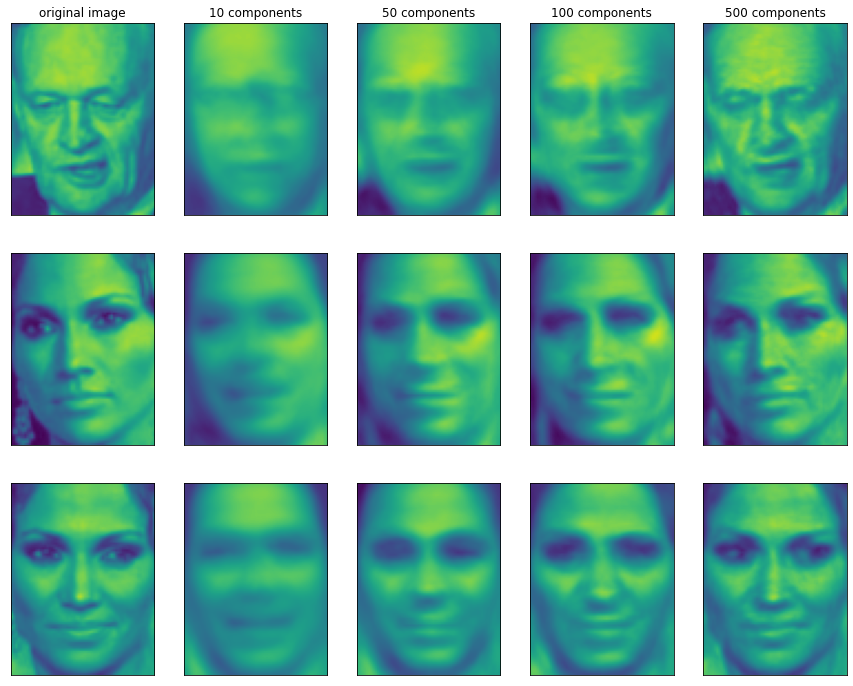

In [27]:
mglearn.plots.plot_nmf_faces(X_train,X_test,image_shape)

first lets inspect how the number of components impacts how well the data can be reconstructed using NMF

NMF is usually not used for its ability to reconstruct or encode data, but rather for finding interesting patterns within the data.
As a first look into the data, let's try extracting only a few components(say 15).


C:\Users\acer\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
C:\Users\acer\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


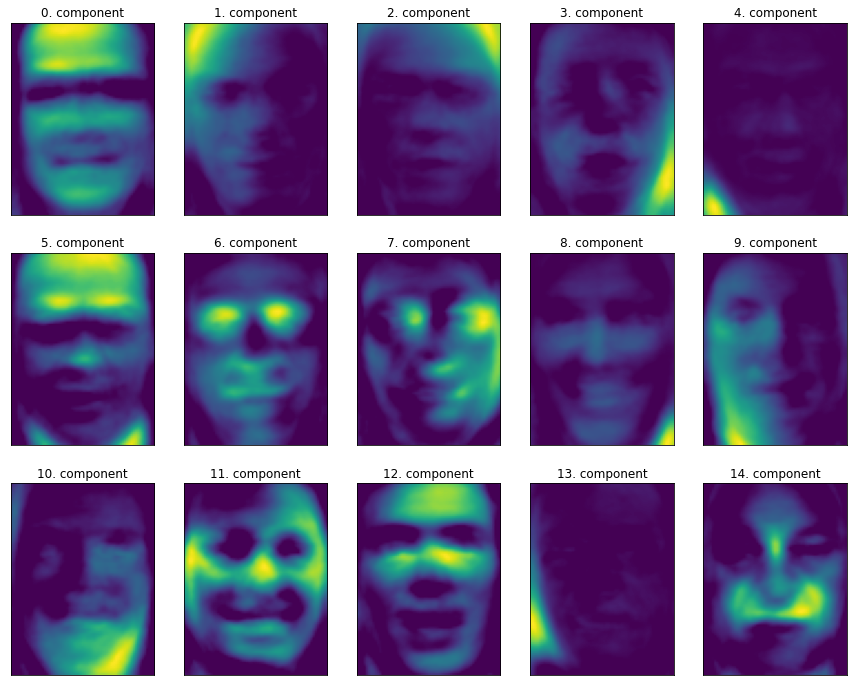

In [31]:
from sklearn.decomposition import NMF
nmf = NMF(n_components = 15, random_state=0)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

fix, axes = plt.subplots(3,5,figsize = (15,12), subplot_kw={'xticks':(),'yticks':()})
for i, (component, ax) in enumerate(zip(nmf.components_,axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("{}. component".format(i))

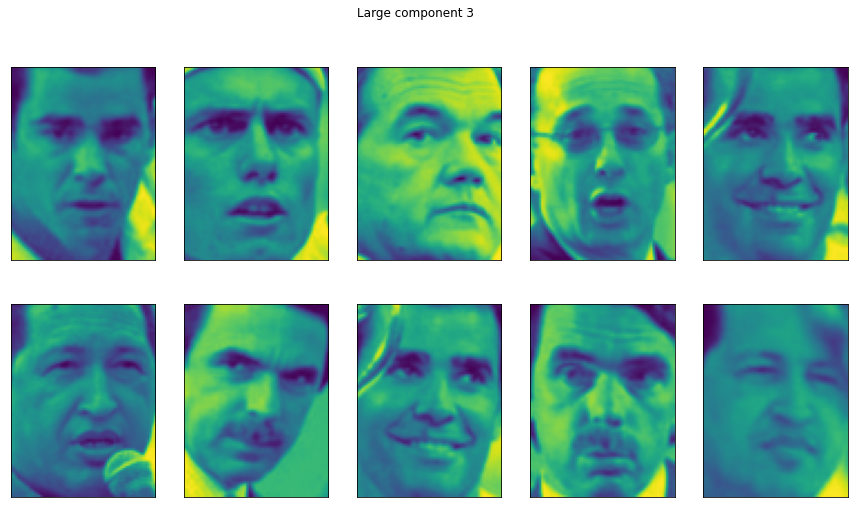

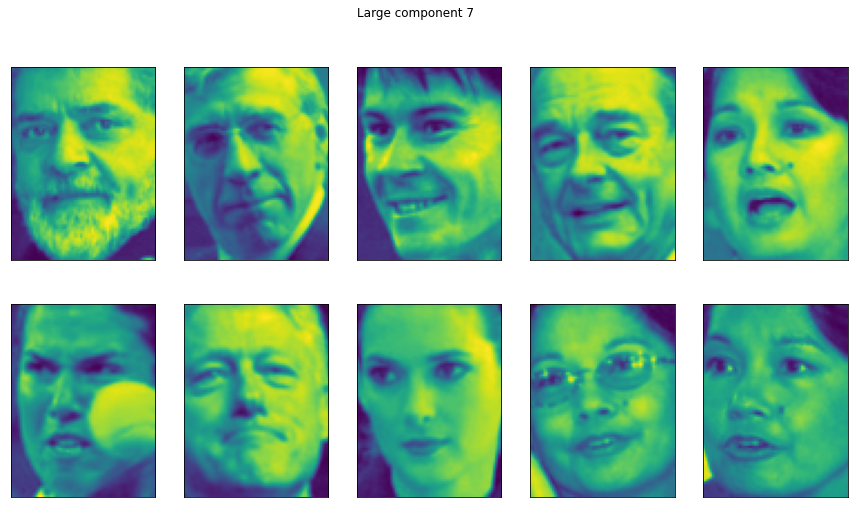

In [33]:
compn = 3
#sort by 3rd component , plot first 10 images
inds = np.argsort(X_train_nmf[:,compn])[::-1]
fig, axes = plt.subplots(2,5, figsize=(15,8), subplot_kw = {'xticks':(),'yticks':()})
fig.suptitle('Large component 3')
for i, (ind,ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))
    
compn=7
#sort by 37th component , plot first 10 images
inds = np.argsort(X_train_nmf[:,compn])[::-1]
fig, axes = plt.subplots(2,5, figsize=(15,8), subplot_kw = {'xticks':(),'yticks':()})
fig.suptitle('Large component 7')
for i, (ind,ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))
    

As expected, faces that have a high coefficient for component 3 are faces looking to the right, while faces with a high coefficient for component 7 are looking to the left. As mentioned earlier, extracting patterns like these works best for data with additive structure, including audio, gene expression, and text data.

### signal that is a combination of three different sources

Text(0, 0.5, 'Signal')

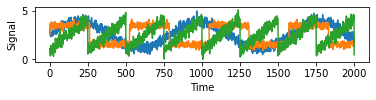

In [35]:
S = mglearn.datasets.make_signals()
plt.figure(figsize=(6,1))
plt.plot(S,'-')
plt.xlabel("Time")
plt.ylabel("Signal")


Unfortunately we cannot observe the original signals, but only an additive mixture of all three of them. We want to recover the decomposition of the mixed signals into the original components. we assume that we have many different ways to observe the mixture, each of which provides us with a series of measurements.

In [36]:
A = np.random.RandomState(0).uniform(size=(100,3))
X = np.dot(S, A.T)
print("Shape of measurements : {}".format(X.shape))

Shape of measurements : (2000, 100)


In [37]:
nmf = NMF(n_components = 3, random_state=42)
S_ = nmf.fit_transform(X)
print("Recovered signal shape : {}".format(S_.shape))


C:\Users\acer\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


Recovered signal shape : (2000, 3)


C:\Users\acer\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


In [38]:
pca = PCA(n_components = 3)
H=pca.fit_transform(X)

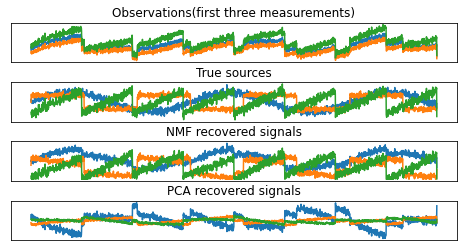

In [39]:
models = [X,S,S_,H]
names = ["Observations(first three measurements)", "True sources","NMF recovered signals","PCA recovered signals"]
fig, axes = plt.subplots(4, figsize=(8,4), gridspec_kw={'hspace':.5},subplot_kw={'xticks':(),'yticks':()})
for model,name, ax in zip(models, names,axes):
    ax.set_title(name)
    ax.plot(model[:,:3],'-')

recovering mixed sources using NMF and PCA

# Manifold Learning with t-SNE

There is a class of algorithms for visualization called manifold learning algorithms that allow for much more complex mappings, and often provide better visualizations. A particularly useful one is the t-SNE algorithm.

The idea behind t-SNE is to find a two dimensional representation of the data that preserves the distances between points as best as possible.

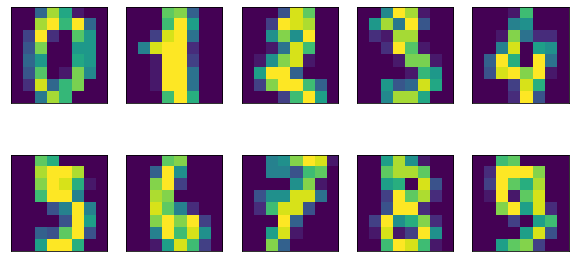

In [42]:
from sklearn.datasets import load_digits
digits = load_digits()

fig, axes = plt.subplots(2,5, figsize=(10,5), subplot_kw={'xticks':(),'yticks':()})
for ax, img in zip(axes.ravel(),digits.images):
    ax.imshow(img)

let's use pca to visualize the data reduced to two dimensions. We plot the first two principal components, and represent each sample with a digit corresponding to its class.

Text(0, 0.5, 'Second principal component')

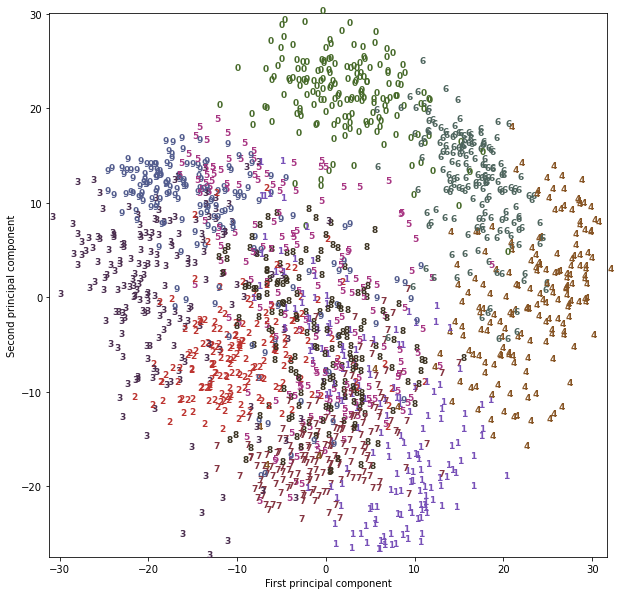

In [43]:
pca = PCA(n_components = 2)
pca.fit(digits.data)
digits_pca = pca.transform(digits.data)
colors = ['#476A2A','#7851B8','#BD3430','#4A2D4E','#875525','#A83683','#4E655E','#853541','#3A3120','#535D8E']
plt.figure(figsize=(10,10))
plt.xlim(digits_pca[:,0].min(),digits_pca[:,0].max())
plt.ylim(digits_pca[:,1].min(),digits_pca[:,1].max())
for i in range(len(digits.data)):
    plt.text(digits_pca[i,0],digits_pca[i,1],str(digits.target[i]),color=colors[digits.target[i]],
             fontdict={'weight':'bold','size':9})
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

lets apply t-SNE to the same dataset, and compare the results. As t-SNE does not support transforming new data, the TSNE class has no transform method. Instead, we can call the fit_transform method, which will build the model and immediately return the transformed data.

Text(0, 0.5, 't-SNE feature 1')

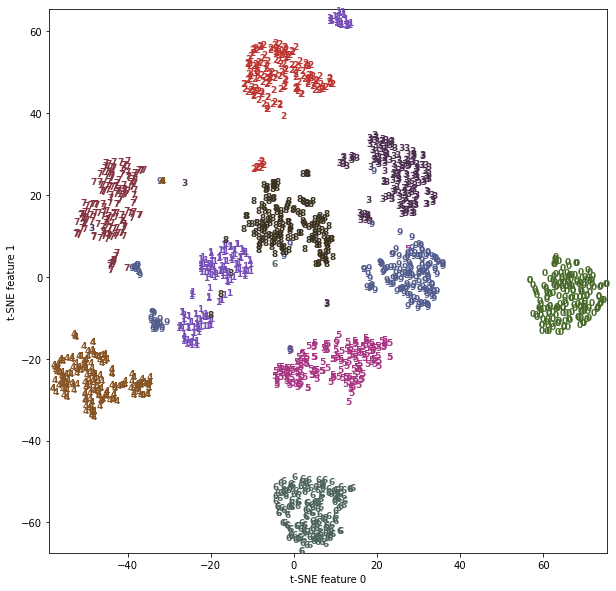

In [44]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
digits_tsne = tsne.fit_transform(digits.data)
plt.figure(figsize=(10,10))
plt.xlim(digits_tsne[:,0].min(),digits_tsne[:,0].max()+1)
plt.ylim(digits_tsne[:,1].min(),digits_tsne[:,1].max()+1)
for i in range(len(digits.data)):
    plt.text(digits_tsne[i,0],digits_tsne[i,1],str(digits.target[i]),
            color=colors[digits.target[i]],
            fontdict={'weight':'bold','size':9})
plt.xlabel("t-SNE feature 0")
plt.ylabel("t-SNE feature 1")